# Classification of Northern Lights

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2


##### Data Loading

In [6]:
df=pd.read_csv('oath_v1.1/classifications/classifications-edited.csv')
df.head()

class2  class6  picNum   picType  rotAng
0       0       2       1  discrete     334
1       0       2       2  discrete      29
2       0       2       3  discrete     355
3       0       0       4       arc     118
4       0       0       5       arc      55

##### Original Images

Displaying 5 images of type: arc


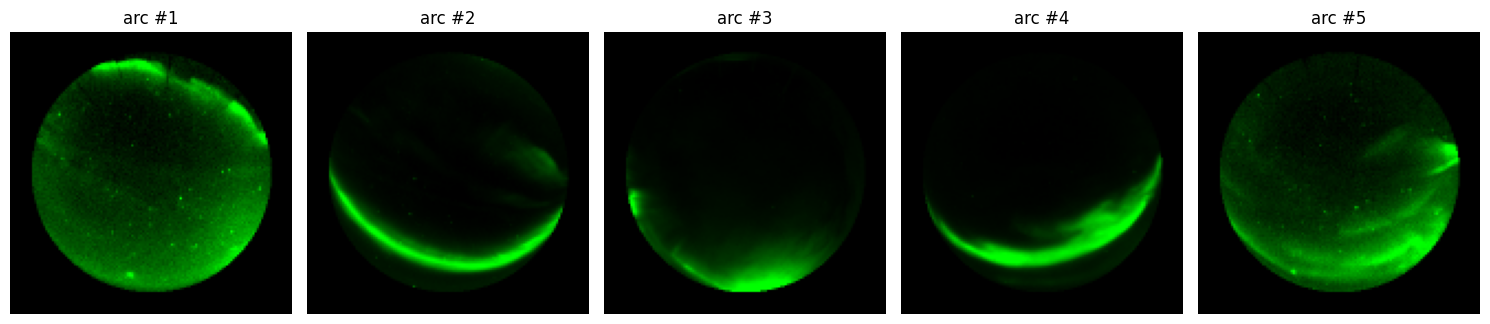

Displaying 5 images of type: cloudy


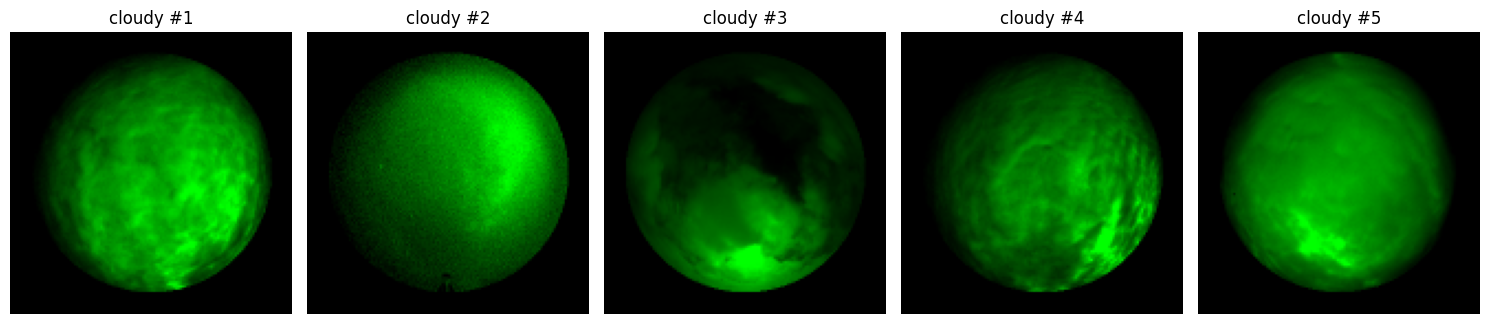

Displaying 5 images of type: diffuse


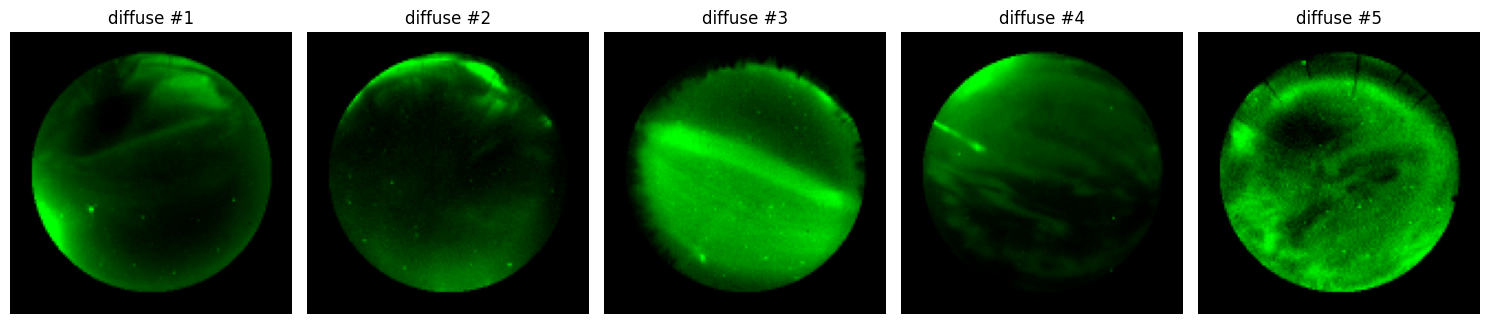

Displaying 5 images of type: discrete


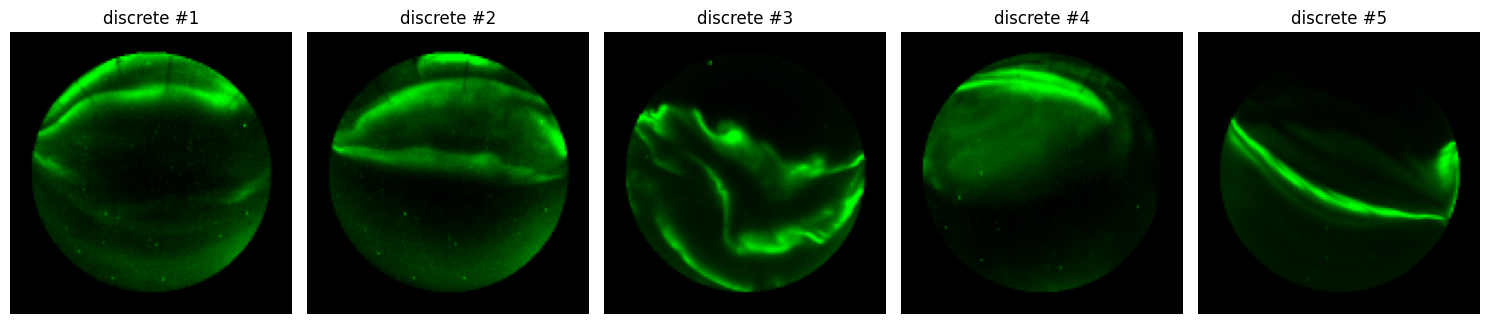

Displaying 5 images of type: moon


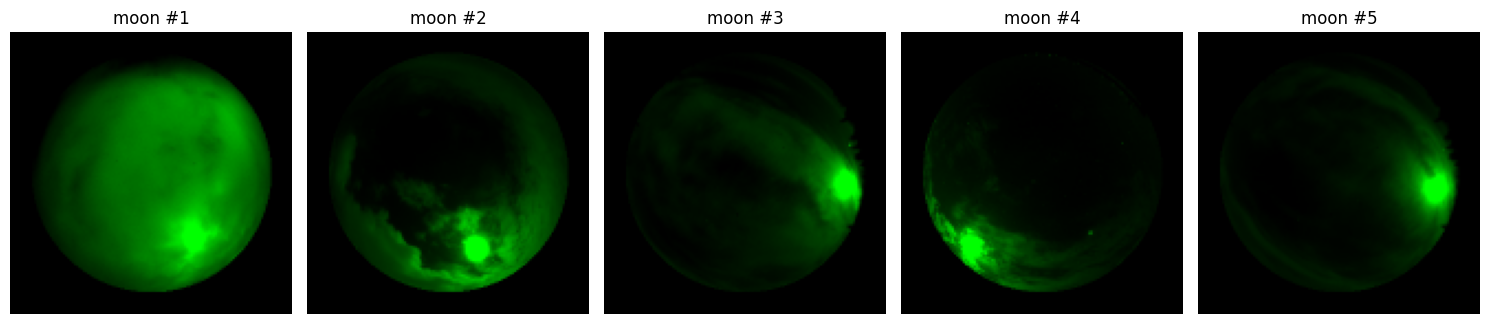

Displaying 5 images of type: noaurora


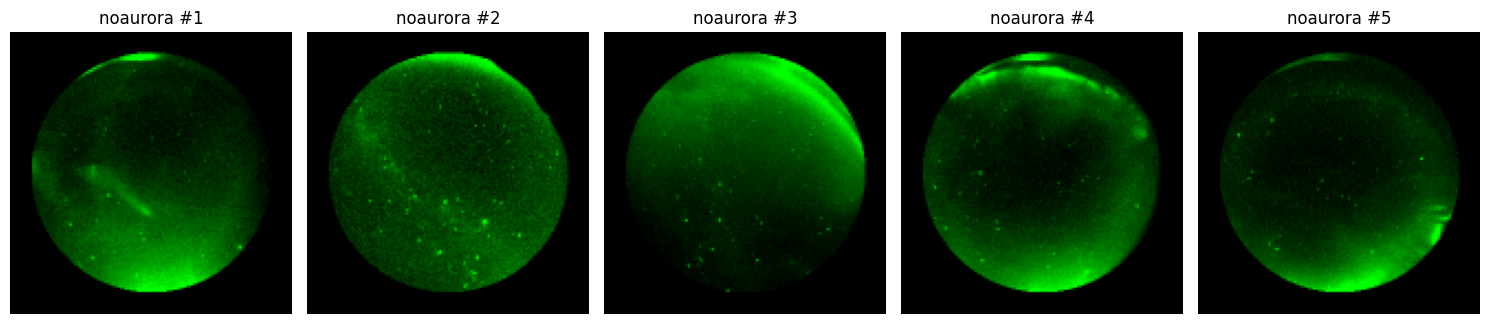

In [7]:

# Group images by type
grouped = df.groupby('picType')  # Replace 'type' with the column name representing image type

# Base path for images
image_folder = "oath_v1.1/images/cropped_scaled/"

# Loop through each type and display 5 images
for image_type, group in grouped:
    print(f"Displaying 5 images of type: {image_type}")
    # Select 5 images from the group
    sampled_images = group.sample(min(5, len(group)))  # Take up to 5 images
    fig, axes = plt.subplots(1, len(sampled_images), figsize=(15, 5))
    for i, pic_num in enumerate(sampled_images['picNum']):  # Replace 'picNum' with the column holding image names/numbers
        image_path = os.path.join(image_folder, f"{pic_num:05d}.png")  # Assuming zero-padded filenames like 00001.png
        image = cv2.imread(image_path)
        if image is not None:
            # Resize the image
            resized_image = cv2.resize(image, (128, 128), interpolation=cv2.INTER_AREA)
            # Display image
            axes[i].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            axes[i].set_title(f"{image_type} #{i+1}")
            axes[i].axis("off")
        else:
            print(f"Could not read image: {image_path}")
    plt.tight_layout()
    plt.show()

##### Adding Gaussian Noise to the Images

Displaying 5 images of type: arc


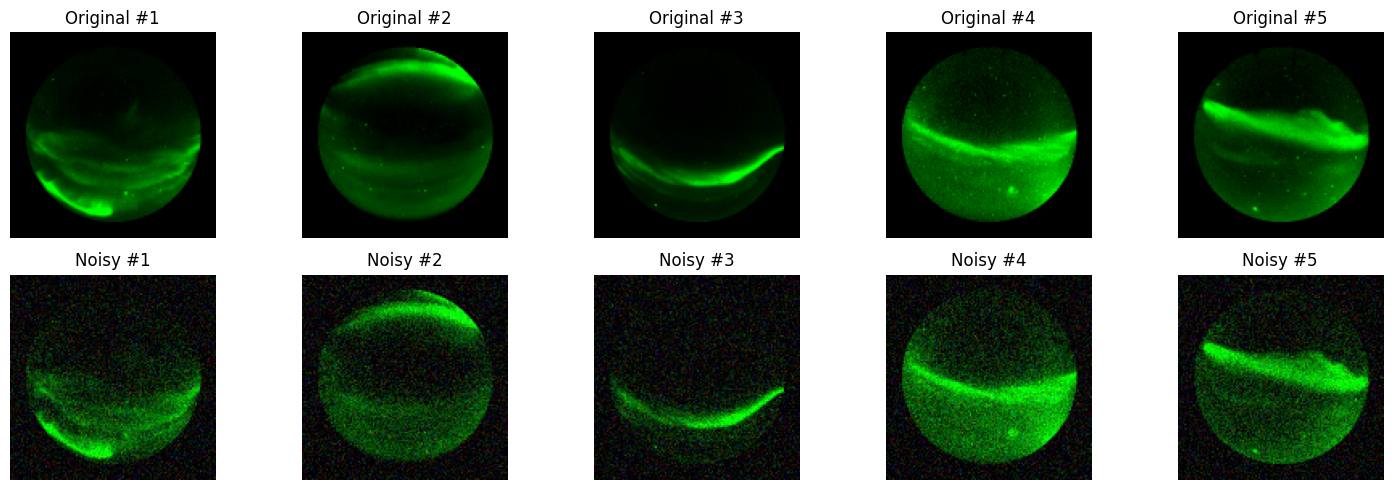

Displaying 5 images of type: cloudy


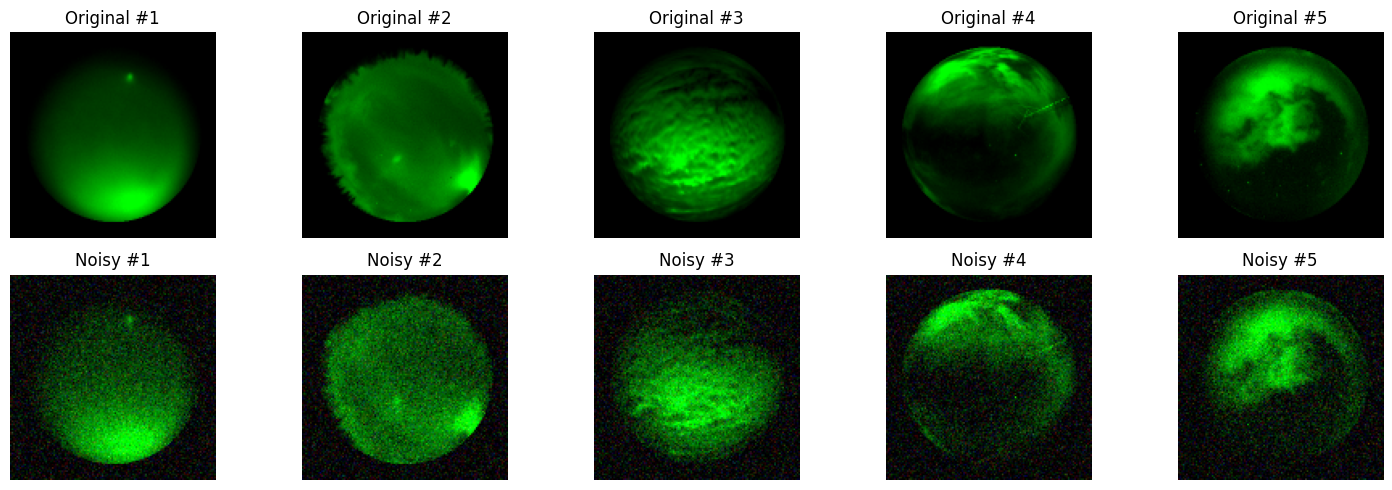

Displaying 5 images of type: diffuse


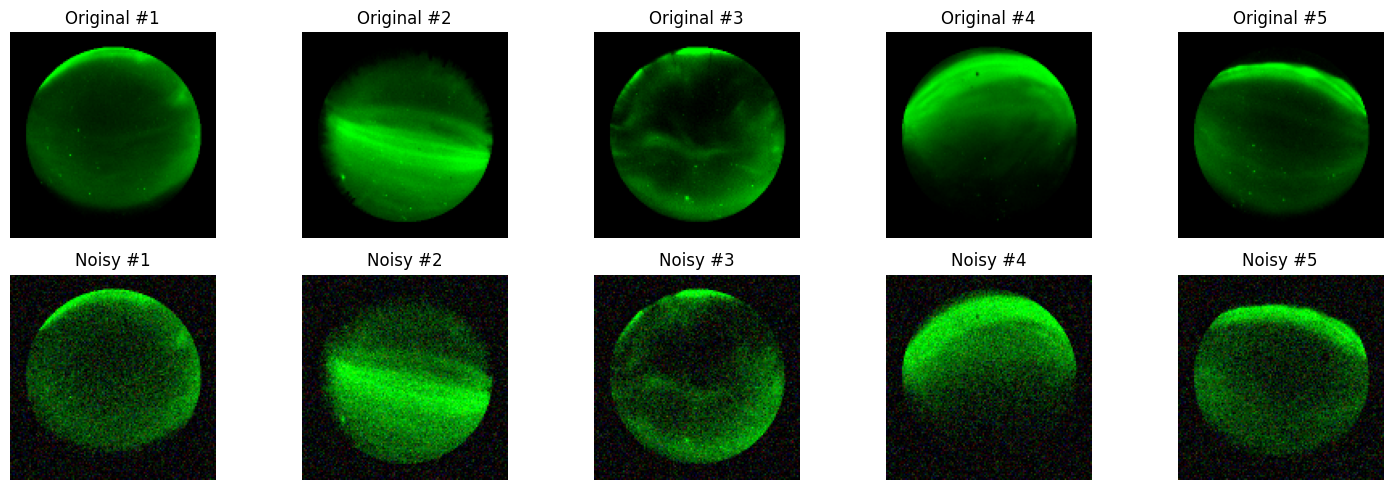

Displaying 5 images of type: discrete


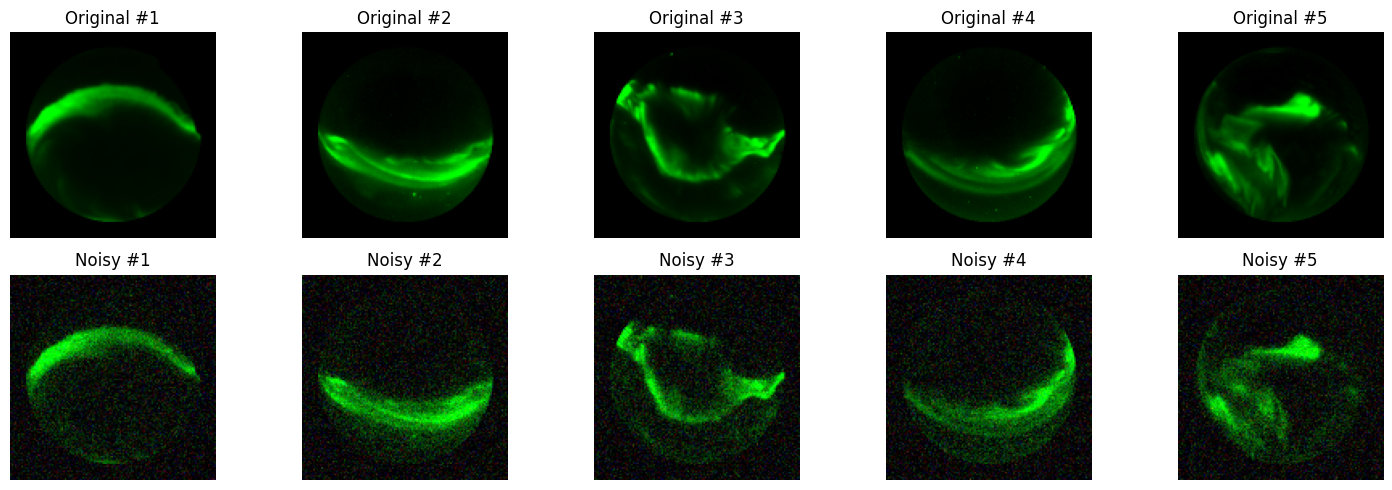

Displaying 5 images of type: moon


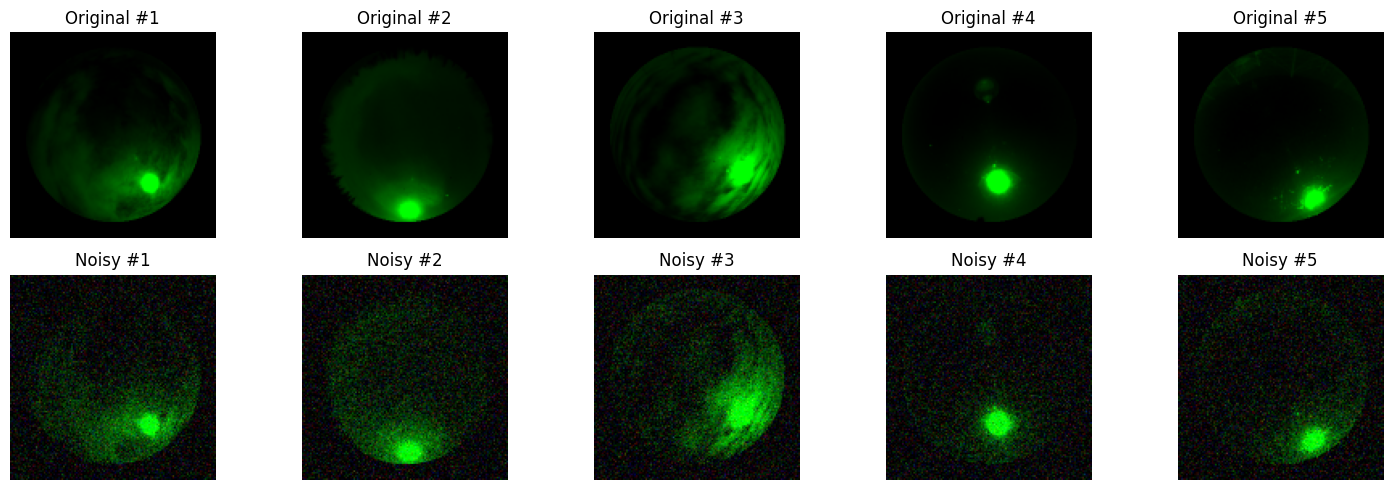

Displaying 5 images of type: noaurora


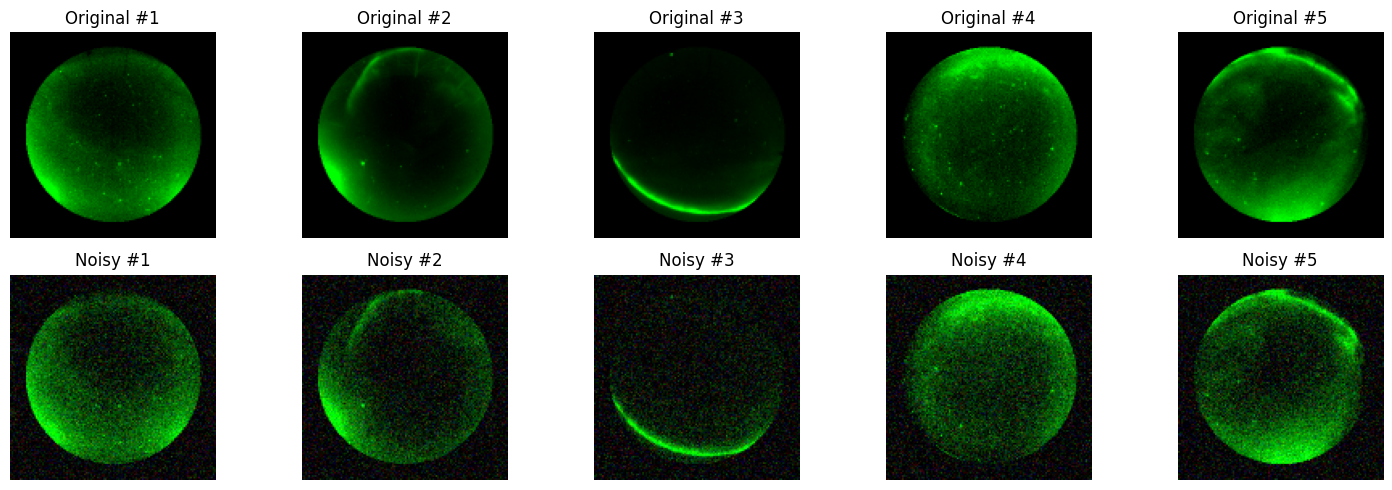

In [8]:
# Group images by type
grouped = df.groupby('picType')  # Replace 'type' with the column name representing image type

# Base path for images
image_folder = "oath_v1.1/images/cropped_scaled/"

# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, std=25):
    gaussian = np.random.normal(mean, std, image.shape).astype(np.float32)
    noisy_image = np.clip(image + gaussian, 0, 255).astype(np.uint8)
    return noisy_image

# Loop through each type and display original vs noisy images
for image_type, group in grouped:
    print(f"Displaying 5 images of type: {image_type}")
    # Select 5 images from the group
    sampled_images = group.sample(min(5, len(group)))  # Take up to 5 images
    fig, axes = plt.subplots(2, len(sampled_images), figsize=(15, 5))
    
    for i, pic_num in enumerate(sampled_images['picNum']):  # Replace 'picNum' with the column holding image names/numbers
        image_path = os.path.join(image_folder, f"{pic_num:05d}.png")  # Assuming zero-padded filenames like 00001.png
        image = cv2.imread(image_path)
        if image is not None:
            # Resize the image
            resized_image = cv2.resize(image, (128, 128), interpolation=cv2.INTER_AREA)
            # Add Gaussian noise
            noisy_image = add_gaussian_noise(resized_image)
            
            # Display original image
            axes[0, i].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            axes[0, i].set_title(f"Original #{i+1}")
            axes[0, i].axis("off")
            
            # Display noisy image
            axes[1, i].imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
            axes[1, i].set_title(f"Noisy #{i+1}")
            axes[1, i].axis("off")
        else:
            print(f"Could not read image: {image_path}")
    
    plt.tight_layout()
    plt.show()

##### Making a noisy image folder

In [9]:
# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, std=25):
    gaussian = np.random.normal(mean, std, image.shape).astype(np.float32)
    noisy_image = np.clip(image + gaussian, 0, 255).astype(np.uint8)
    return noisy_image


# Base path for original and noisy images
original_folder = "oath_v1.1/images/cropped_scaled/"
noisy_folder = "oath_v1.1/images/cropped_scaled_noisy/"

# Create the new folder if it doesn't exist
os.makedirs(noisy_folder, exist_ok=True)

# Process each image in the dataset
for _, row in df.iterrows():
    pic_num = row['picNum']  # Replace 'picNum' with the appropriate column name
    image_path = os.path.join(original_folder, f"{pic_num:05d}.png")  # Adjust filename format if needed
    noisy_image_path = os.path.join(noisy_folder, f"{pic_num:05d}.png")
    
    # Read the original image
    image = cv2.imread(image_path)
    if image is not None:
        # Add Gaussian noise
        noisy_image = add_gaussian_noise(image)
        
        # Save the noisy image
        cv2.imwrite(noisy_image_path, noisy_image)
    else:
        print(f"Could not read image: {image_path}")

print(f"All noisy images saved to {noisy_folder}")

All noisy images saved to oath_v1.1/images/cropped_scaled_noisy/


##### Salt n pepper

In [10]:
import os
import numpy as np
import cv2

# Function to add salt-and-pepper noise
def add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Add salt noise (white pixels)
    num_salt = int(salt_prob * total_pixels)
    salt_coords = [np.random.randint(0, dim, num_salt) for dim in image.shape[:2]]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    # Add pepper noise (black pixels)
    num_pepper = int(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, dim, num_pepper) for dim in image.shape[:2]]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

# Base path for original and noisy images
original_folder = "oath_v1.1/images/cropped_scaled/"
noisy_folder = "oath_v1.1/images/cropped_scaled_sp/"  # Folder for salt-and-pepper noisy images

# Create the new folder if it doesn't exist
os.makedirs(noisy_folder, exist_ok=True)

# Process each image in the dataset
for _, row in df.iterrows():
    pic_num = row['picNum']  # Replace 'picNum' with the appropriate column name
    image_path = os.path.join(original_folder, f"{pic_num:05d}.png")  # Adjust filename format if needed
    noisy_image_path = os.path.join(noisy_folder, f"{pic_num:05d}.png")
    
    # Read the original image
    image = cv2.imread(image_path)
    if image is not None:
        # Add salt-and-pepper noise
        noisy_image = add_salt_and_pepper_noise(image)
        
        # Save the noisy image
        cv2.imwrite(noisy_image_path, noisy_image)
    else:
        print(f"Could not read image: {image_path}")

print(f"All noisy images saved to {noisy_folder}")

All noisy images saved to oath_v1.1/images/cropped_scaled_sp/


##### Feature Extraction on the basis of specific feature and different angles

In [11]:
from skimage.feature import graycomatrix, graycoprops

rough_df = pd.DataFrame(df)

# Image folder path
image_folder = 'oath_v1.1/images/cropped_scaled_noisy'

# Define angles and distance for GLCM computation
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0, 45, 90, 135 degrees
distances = [1]

# Initialize lists to store features
contrast_list = {angle: [] for angle in angles}
dissimilarity_list = {angle: [] for angle in angles}
homogeneity_list = {angle: [] for angle in angles}
energy_list = {angle: [] for angle in angles}
correlation_list = {angle: [] for angle in angles}

# Loop through each row in the dataframe
for index, row in rough_df.iterrows():
    pic_num = str(row['picNum']).zfill(5)  # Format picNum as 5 digits
    image_path = f"{image_folder}/{pic_num}.png"
    
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is not None:
        # Compute GLCM for each angle
        for angle in angles:
            glcm = graycomatrix(img, distances=distances, angles=[angle], levels=256, symmetric=True, normed=True)
            
            # Compute texture properties
            contrast = graycoprops(glcm, prop='contrast')[0, 0]
            dissimilarity = graycoprops(glcm, prop='dissimilarity')[0, 0]
            homogeneity = graycoprops(glcm, prop='homogeneity')[0, 0]
            energy = graycoprops(glcm, prop='energy')[0, 0]
            correlation = graycoprops(glcm, prop='correlation')[0, 0]
            
            # Append the features to the lists
            contrast_list[angle].append(contrast)
            dissimilarity_list[angle].append(dissimilarity)
            homogeneity_list[angle].append(homogeneity)
            energy_list[angle].append(energy)
            correlation_list[angle].append(correlation)
    else:
        # In case of missing image, append NaNs
        for angle in angles:
            contrast_list[angle].append(np.nan)
            dissimilarity_list[angle].append(np.nan)
            homogeneity_list[angle].append(np.nan)
            energy_list[angle].append(np.nan)
            correlation_list[angle].append(np.nan)

# Add the computed features to the dataframe
for angle in angles:
    angle_degree = int(np.degrees(angle))  # Convert radian to degrees
    rough_df[f'contrast_{angle_degree}'] = contrast_list[angle]
    rough_df[f'dissimilarity_{angle_degree}'] = dissimilarity_list[angle]
    rough_df[f'homogeneity_{angle_degree}'] = homogeneity_list[angle]
    rough_df[f'energy_{angle_degree}'] = energy_list[angle]
    rough_df[f'correlation_{angle_degree}'] = correlation_list[angle]

# Display the updated dataframe
rough_df.head(10)

class2  class6  picNum   picType  rotAng  contrast_0  dissimilarity_0  \
0       0       2       1  discrete     334  351.841085        14.186581   
1       0       2       2  discrete      29  338.897396        13.929902   
2       0       2       3  discrete     355  352.677696        14.186581   
3       0       0       4       arc     118  379.797365        14.644945   
4       0       0       5       arc      55  380.447672        14.657108   
5       0       1       6   diffuse      12  407.735248        15.091621   
6       0       1       7   diffuse     334  410.253845        15.139537   
7       0       1       8   diffuse      29  436.930346        15.558104   
8       0       1       9   diffuse     355  436.152359        15.531526   
9       0       1      10   diffuse      24  437.605545        15.558180   

   homogeneity_0  energy_0  correlation_0  ...  contrast_90  dissimilarity_90  \
0       0.091288  0.032672       0.825274  ...   353.170496         14.200797   
1       0.092928  0.033549       0.804523  ...   344.393061         14.041039   
2       0.091726  0.032340       0.836805  ...   360.569210         14.318199   
3       0.091680  0.032284       0.837630  ...   388.479718         14.789675   
4       0.089946  0.031783       0.837763  ...   386.268306         14.771952   
5       0.088050  0.031118       0.847432  ...   415.133563         15.239568   
6       0.088806  0.031153       0.854272  ...   416.254534         15.229228   
7       0.088227  0.030758       0.839482  ...   441.398039         15.572365   
8       0.086559  0.030192       0.839174  ...   440.450705         15.598744   
9       0.088502  0.031206       0.837064  ...   441.881756         15.616559   

   homogeneity_90  energy_90  correlation_90  contrast_135  dissimilarity_135  \
0        0.090654   0.032483        0.824586    354.985713          14.252826   
1        0.093042   0.033669        0.801378    345.580484          14.058331   
2        0.090771   0.032124        0.833158    358.655102          14.297824   
3        0.090032   0.032442        0.833914    389.204091          14.847951   
4        0.088125   0.031467        0.835280    382.958247          14.733318   
5        0.086719   0.030967        0.844670    411.102976          15.211549   
6        0.087497   0.030796        0.852132    414.241799          15.223391   
7        0.089311   0.031011        0.837812    436.685521          15.617993   
8        0.086460   0.030277        0.837605    439.758247          15.625928   
9        0.087244   0.031011        0.835453    436.259131          15.573887   

   homogeneity_135  energy_135  correlation_135  
0         0.091087    0.032396         0.824027  
1         0.092917    0.033465         0.801049  
2         0.091422    0.032356         0.834333  
3         0.089243    0.031825         0.833909  
4         0.090375    0.031754         0.836969  
5         0.088041    0.030888         0.846413  
6         0.087950    0.030946         0.853071  
7         0.086977    0.030690         0.839810  
8         0.087533    0.030155         0.838095  
9         0.087908    0.030560         0.837794  

[10 rows x 25 columns]

In [12]:
#  DEFINNG TEST DATA
from skimage.feature import graycomatrix, graycoprops


# Image folder path for test data
test_image_folder = '/Users/nishchayaroy/Desktop/ML_final_sub/final_notebooks/Dataset2/arc_png'


# Define angles and distances for GLCM computation
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0, 45, 90, 135 degrees
distances = [1]


# Initialize lists to store features
contrast_list = {angle: [] for angle in angles}
dissimilarity_list = {angle: [] for angle in angles}
homogeneity_list = {angle: [] for angle in angles}
energy_list = {angle: [] for angle in angles}
correlation_list = {angle: [] for angle in angles}


# List all PNG files in the test image folder
test_images = [f for f in os.listdir(test_image_folder) if f.endswith('.png')]


# Initialize a dataframe to store results
test_df = pd.DataFrame({'image_name': test_images})


# Process each test image
for image_name in test_images:
   image_path = os.path.join(test_image_folder, image_name)
  
   # Load the image in grayscale
   img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  
   if img is not None:
       # Compute GLCM for each angle
       for angle in angles:
           glcm = graycomatrix(img, distances=distances, angles=[angle], levels=256, symmetric=True, normed=True)
          
           # Compute texture properties
           contrast = graycoprops(glcm, prop='contrast')[0, 0]
           dissimilarity = graycoprops(glcm, prop='dissimilarity')[0, 0]
           homogeneity = graycoprops(glcm, prop='homogeneity')[0, 0]
           energy = graycoprops(glcm, prop='energy')[0, 0]
           correlation = graycoprops(glcm, prop='correlation')[0, 0]
          
           # Append the features to the lists
           contrast_list[angle].append(contrast)
           dissimilarity_list[angle].append(dissimilarity)
           homogeneity_list[angle].append(homogeneity)
           energy_list[angle].append(energy)
           correlation_list[angle].append(correlation)
   else:
       # In case of missing or unreadable image, append NaNs
       for angle in angles:
           contrast_list[angle].append(np.nan)
           dissimilarity_list[angle].append(np.nan)
           homogeneity_list[angle].append(np.nan)
           energy_list[angle].append(np.nan)
           correlation_list[angle].append(np.nan)


# Add the computed features to the test dataframe
for angle in angles:
   angle_degree = int(np.degrees(angle))  # Convert radian to degrees
   test_df[f'contrast_{angle_degree}'] = contrast_list[angle]
   test_df[f'dissimilarity_{angle_degree}'] = dissimilarity_list[angle]
   test_df[f'homogeneity_{angle_degree}'] = homogeneity_list[angle]
   test_df[f'energy_{angle_degree}'] = energy_list[angle]
   test_df[f'correlation_{angle_degree}'] = correlation_list[angle]


# Display the updated test dataframe
# test_df['class2'] = 0
# test_df['rotAng'] = 0
test_df = test_df.drop(columns=['image_name'])

##### Random Forest Model Classification

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataframe is named df and is already loaded
# df contains the numerical features and class6 is the target

# Separate input features (X) and target variable (y)
X = rough_df.drop(columns=['class2','class6','rotAng', 'picNum', 'picType'])
y = rough_df['class6']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 71.63%

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.35      0.45       185
           1       0.69      0.67      0.68       284
           2       0.62      0.75      0.68       363
           3       0.81      0.77      0.79       196
           4       0.82      0.84      0.83       164
           5       0.80      0.88      0.83       264

    accuracy                           0.72      1456
   macro avg       0.73      0.71      0.71      1456
weighted avg       0.71      0.72      0.71      1456



##### Stratified CV technique with 100 folds using RF classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataframe is named rough_df
# Separate input features (X) and target variable (y)
X = rough_df.drop(columns=['class2','class6','rotAng', 'picNum', 'picType'])
y = rough_df['class6']  # Target variable

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=100, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')

# Print the results
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean cross-validated accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy: {cv_scores.std() * 100:.2f}%")

Cross-validated accuracy scores: [0.6779661  0.84745763 0.69491525 0.76271186 0.69491525 0.62711864
 0.71186441 0.81355932 0.83050847 0.62711864 0.79661017 0.72881356
 0.69491525 0.6440678  0.86440678 0.61016949 0.83050847 0.84745763
 0.76271186 0.83050847 0.6779661  0.6779661  0.6779661  0.74576271
 0.82758621 0.60344828 0.81034483 0.68965517 0.63793103 0.86206897
 0.74137931 0.72413793 0.74137931 0.79310345 0.74137931 0.74137931
 0.74137931 0.77586207 0.72413793 0.68965517 0.72413793 0.75862069
 0.5862069  0.63793103 0.72413793 0.75862069 0.74137931 0.65517241
 0.63793103 0.74137931 0.70689655 0.72413793 0.68965517 0.77586207
 0.72413793 0.74137931 0.67241379 0.77586207 0.75862069 0.62068966
 0.65517241 0.68965517 0.74137931 0.70689655 0.5862069  0.63793103
 0.74137931 0.70689655 0.75862069 0.70689655 0.79310345 0.74137931
 0.65517241 0.68965517 0.72413793 0.72413793 0.65517241 0.81034483
 0.74137931 0.79310345 0.67241379 0.70689655 0.70689655 0.72413793
 0.75862069 0.75862069 0.6724

In [15]:
rough_df.head(10)

class2  class6  picNum   picType  rotAng  contrast_0  dissimilarity_0  \
0       0       2       1  discrete     334  351.841085        14.186581   
1       0       2       2  discrete      29  338.897396        13.929902   
2       0       2       3  discrete     355  352.677696        14.186581   
3       0       0       4       arc     118  379.797365        14.644945   
4       0       0       5       arc      55  380.447672        14.657108   
5       0       1       6   diffuse      12  407.735248        15.091621   
6       0       1       7   diffuse     334  410.253845        15.139537   
7       0       1       8   diffuse      29  436.930346        15.558104   
8       0       1       9   diffuse     355  436.152359        15.531526   
9       0       1      10   diffuse      24  437.605545        15.558180   

   homogeneity_0  energy_0  correlation_0  ...  contrast_90  dissimilarity_90  \
0       0.091288  0.032672       0.825274  ...   353.170496         14.200797   
1       0.092928  0.033549       0.804523  ...   344.393061         14.041039   
2       0.091726  0.032340       0.836805  ...   360.569210         14.318199   
3       0.091680  0.032284       0.837630  ...   388.479718         14.789675   
4       0.089946  0.031783       0.837763  ...   386.268306         14.771952   
5       0.088050  0.031118       0.847432  ...   415.133563         15.239568   
6       0.088806  0.031153       0.854272  ...   416.254534         15.229228   
7       0.088227  0.030758       0.839482  ...   441.398039         15.572365   
8       0.086559  0.030192       0.839174  ...   440.450705         15.598744   
9       0.088502  0.031206       0.837064  ...   441.881756         15.616559   

   homogeneity_90  energy_90  correlation_90  contrast_135  dissimilarity_135  \
0        0.090654   0.032483        0.824586    354.985713          14.252826   
1        0.093042   0.033669        0.801378    345.580484          14.058331   
2        0.090771   0.032124        0.833158    358.655102          14.297824   
3        0.090032   0.032442        0.833914    389.204091          14.847951   
4        0.088125   0.031467        0.835280    382.958247          14.733318   
5        0.086719   0.030967        0.844670    411.102976          15.211549   
6        0.087497   0.030796        0.852132    414.241799          15.223391   
7        0.089311   0.031011        0.837812    436.685521          15.617993   
8        0.086460   0.030277        0.837605    439.758247          15.625928   
9        0.087244   0.031011        0.835453    436.259131          15.573887   

   homogeneity_135  energy_135  correlation_135  
0         0.091087    0.032396         0.824027  
1         0.092917    0.033465         0.801049  
2         0.091422    0.032356         0.834333  
3         0.089243    0.031825         0.833909  
4         0.090375    0.031754         0.836969  
5         0.088041    0.030888         0.846413  
6         0.087950    0.030946         0.853071  
7         0.086977    0.030690         0.839810  
8         0.087533    0.030155         0.838095  
9         0.087908    0.030560         0.837794  

[10 rows x 25 columns]

In [16]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Load OATH dataset and create labels
def load_oath_dataset(folder_path, image_size=(128, 128)):
    images, labels = [], []
    class_names = sorted(os.listdir(folder_path))  # Assuming folder structure is: folder_path/class_name/images
    for class_idx, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for file_name in os.listdir(class_path):
                image_path = os.path.join(class_path, file_name)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
                if image is not None:
                    resized_image = cv2.resize(image, image_size)  # Resize to uniform size
                    images.append(resized_image.flatten())  # Flatten into a vector
                    labels.append(class_idx)  # Assign class index as label
    return np.array(images), np.array(labels), class_names

# Path to OATH dataset
oath_folder = "oath_v1.1/images/cropped_scaled_noisy"  # Update this path based on your dataset structure
X = rough_df.drop(columns=['class2','class6','rotAng', 'picNum', 'picType'])
y = rough_df['class6']  # Target variable
class_names=['diffuse','arc','discrete','noaurora','moon','cloudy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter grid for GridSearchCV
param_grid = {
    'solver': ['adam', 'sgd', 'lbfgs'],           # Different solvers
    'learning_rate_init': [1e-4, 1e-5, 1e-6],     # Different learning rates
    'batch_size': [64, 128, 256],                 # Different batch sizes
    'hidden_layer_sizes': [(128, 64, 32)],        # Fixed layer sizes
    'activation': ['relu', 'tanh']               # Best activation functions
}

# Initialize the MLPClassifier with max_iter set to a reasonable limit
mlp = MLPClassifier(max_iter=100, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters from Grid Search:")
print(best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = best_model.score(X_test, y_test)

print(f"\nTest Set Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=   6.4s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=   7.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=   8.9s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=   8.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=   9.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=   9.7s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  10.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=   7.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=   7.4s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  11.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=   9.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  11.4s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=   6.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  11.6s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=  10.9s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=  10.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=   8.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=   6.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  10.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=   9.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  10.7s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  10.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=   9.3s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=   9.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=   7.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=   8.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=   7.4s
[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=   7.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=   8.0s
[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=   7.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=   9.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=   9.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=   8.1s
[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=   6.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=  10.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  11.2s
[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  11.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  11.2s
[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=   9.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=   8.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=   7.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=   8.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=   9.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=  10.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  10.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=  10.5s
[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  11.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  11.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=   9.1s
[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=   9.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=   8.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=   9.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=   9.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  10.1s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  10.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=  11.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=  10.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=  10.2s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=  11.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=  10.0s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=   3.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  11.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  11.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  12.5s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=  13.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=  12.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=  13.3s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=  15.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown

[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  15.0s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=  16.4s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=  14.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  14.9s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  14.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=  14.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=  11.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=  13.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=  11.7s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=  13.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=  15.3s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=  11.5s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=  14.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  30.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  31.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  31.4s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=  20.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=  21.0s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=  19.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  29.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=  17.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=  18.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  30.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=  25.8s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=  26.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=  26.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  28.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=  16.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=  14.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  24.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  25.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=  20.0s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  24.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=  20.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=  21.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=  15.3s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=   8.9s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=  13.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  15.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  14.9s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=  14.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  15.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=  14.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=  13.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=  13.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=  13.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  14.4s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  14.2s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  14.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=  13.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=  13.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=  13.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=  14.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=  14.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  14.8s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  15.0s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  15.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=  14.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=  14.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=  13.9s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=  15.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=  14.4s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  13.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=  13.3s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  14.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  14.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=sgd; total time=  13.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=  13.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=  11.4s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=  13.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  12.0s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=lbfgs; total time=  12.4s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=adam; total time=  12.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=  11.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=sgd; total time=  11.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=  12.2s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  12.5s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=adam; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=  13.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-05, solver=lbfgs; total time=  13.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=  12.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=  10.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=sgd; total time=   9.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=   9.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=  10.4s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=1e-06, solver=lbfgs; total time=  10.2s

Best Hyperparameters from Grid Search:
{'activation': 'tanh', 'batch_size': 64, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.0001, 'solver': 'adam'}
Best Cross-Validation Accuracy: 0.5950

Test Set Accuracy: 0.5734

Classification Report:
              precision    recall  f1-score   support

     diffuse       0.60      0.02      0.04       155
         arc       0.39      0.56      0.46       221
    discrete       0.54      0.76      0.63       280
    noaurora       0.70      0.59      0.64       170
        moon       0.84      0.80      0.82       123
      cloudy       0.69      0.61      0.65       216

    accuracy                           0.57      1165
   macro avg       0.63      0.56      0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
pass
# import os
# import numpy as np
# import cv2
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPRegressor
# import matplotlib.pyplot as plt

# # Load OATH dataset
# def load_oath_images(folder_path, image_size=(256, 256)):
#     images = []
#     for file_name in sorted(os.listdir(folder_path)):
#         image_path = os.path.join(folder_path, file_name)
#         image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
#         if image is not None:
#             resized_image = cv2.resize(image, image_size)  # Resize to uniform size
#             images.append(resized_image.flatten())  # Flatten into a vector
#     return np.array(images)

# # Path to OATH dataset
# oath_folder = "oath_v1.1/images/cropped_scaled_noisy"  # Update path as per your dataset
# data = load_oath_images(oath_folder)

# # Split data into training and validation sets
# X_train, X_val = train_test_split(data, test_size=0.2, random_state=42)


# # Define network structure and hyperparameters
# layer_sizes = [256, 128, 64, 128, 256]  # Input -> Hidden -> Output
# learning_rate = 2e-5
# max_iter = 100

# # Initialize dictionary to store loss histories for tanh activation
# loss_history_tanh = {'train': [], 'val': []}

# # Train with 'tanh' activation function
# mlp_tanh = MLPRegressor(hidden_layer_sizes=layer_sizes, activation='tanh', solver='adam',
#                         learning_rate_init=learning_rate, max_iter=1, warm_start=True)
# print("Training with tanh activation...")
# for epoch in range(max_iter):
#     mlp_tanh.fit(X_train, X_train)  # Fit model to reconstruct input
    
#     # Calculate training and validation loss
#     train_loss = np.mean((mlp_tanh.predict(X_train) - X_train) ** 2)
#     val_loss = np.mean((mlp_tanh.predict(X_val) - X_val) ** 2)
    
#     # Record losses
#     loss_history_tanh['train'].append(train_loss)
#     loss_history_tanh['val'].append(val_loss)
    
#     if epoch % 10 == 0 or epoch == max_iter - 1:
#         print(f"Epoch {epoch}, Train Loss (tanh): {train_loss:.4f}, Val Loss (tanh): {val_loss:.4f}")

# # Plot training and validation loss for tanh activation
# plt.figure(figsize=(10, 5))
# plt.plot(loss_history_tanh['train'], label="Train Loss (tanh)", linestyle='-')
# plt.plot(loss_history_tanh['val'], label="Validation Loss (tanh)", linestyle='--')
# plt.xlabel("Epochs")
# plt.ylabel("Mean Squared Error Loss")
# plt.title("Training and Validation Loss (tanh activation)")
# plt.legend()
# plt.grid()
# plt.show()

##### Extracting Features from MLP Regressor

In [18]:
pass
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# # Define function to extract features from a specific MLP layer
# def extract_features(mlp, data):
#     # Use the trained MLP to transform data into features
#     hidden_layer_features = mlp.predict(data)  # Output from the final layer
#     return hidden_layer_features

# # Extract features from the trained MLP regressor
# features_train = extract_features(mlp_tanh, X_train)
# features_val = extract_features(mlp_tanh, X_val)

# # Generate synthetic labels for demonstration purposes (replace with actual labels if available)
# y_train = np.random.randint(0, 2, size=features_train.shape[0])  # Binary classification
# y_val = np.random.randint(0, 2, size=features_val.shape[0])      # Binary classification

# # Train Random Forest Classifier
# rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_clf.fit(features_train, y_train)
# rf_preds = rf_clf.predict(features_val)
# rf_accuracy = accuracy_score(y_val, rf_preds)

# # Train MLP Classifier
# mlp_clf = MLPClassifier(hidden_layer_sizes=(64, 32), activation='tanh', solver='adam', max_iter=200)
# mlp_clf.fit(features_train, y_train)
# mlp_preds = mlp_clf.predict(features_val)
# mlp_accuracy = accuracy_score(y_val, mlp_preds)

# # Print results
# print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
# print(f"MLP Classifier Accuracy: {mlp_accuracy:.4f}")

##### Preprocessing for NB, SVM and GMM

In [19]:
X = rough_df.drop(columns=['class2','class6','rotAng', 'picNum', 'picType'])  # Drop non-numeric and non-feature columns
y = rough_df['class6']  # Target variable


In [20]:
from sklearn.preprocessing import StandardScaler

# Standardize the features for SVM and GMM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale features

##### NB classifier

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # Adjust `n_splits` as needed

# Initialize Gaussian Naive Bayes
nb_model = GaussianNB()

# Perform cross-validation
cv_scores_nb = cross_val_score(nb_model, X, y, cv=skf, scoring='accuracy')

# Print results
print(f"Naive Bayes Cross-validated accuracy scores: {cv_scores_nb}")
print(f"Mean Cross-validated accuracy: {cv_scores_nb.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy: {cv_scores_nb.std() * 100:.2f}%")

Naive Bayes Cross-validated accuracy scores: [0.44939966 0.46312178 0.44768439 0.45626072 0.43298969 0.45876289
 0.4467354  0.4347079  0.44501718 0.44158076]
Mean Cross-validated accuracy: 44.76%
Standard deviation of accuracy: 0.93%


##### SVM Classifer

In [22]:
from sklearn.svm import SVC

# Initialize SVM with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Perform cross-validation
cv_scores_svm = cross_val_score(svm_model, X_scaled, y, cv=skf, scoring='accuracy')

# Print results
print(f"SVM Cross-validated accuracy scores: {cv_scores_svm}")
print(f"Mean Cross-validated accuracy: {cv_scores_svm.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy: {cv_scores_svm.std() * 100:.2f}%")

SVM Cross-validated accuracy scores: [0.62264151 0.61749571 0.61234991 0.62607204 0.59450172 0.60309278
 0.61340206 0.60996564 0.60309278 0.62371134]
Mean Cross-validated accuracy: 61.26%
Standard deviation of accuracy: 0.97%


##### GMM classifier

In [35]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
import numpy as np

# Train a GMM for each class
class_gmm_models = {}
unique_classes = np.unique(y)

for cls in unique_classes:
    gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=42)
    class_gmm_models[cls] = gmm.fit(X_scaled[y == cls])

# Predict the class for each sample
def predict_gmm(models, data):
    likelihoods = np.array([model.score_samples(data) for model in models.values()]).T
    return np.array(list(models.keys()))[np.argmax(likelihoods, axis=1)]

gmm_predictions = predict_gmm(class_gmm_models, X_scaled)
gmm_accuracy = accuracy_score(y, gmm_predictions)

# Print results
print(f"GMM Accuracy: {gmm_accuracy * 100:.2f}%")

GMM Accuracy: 85.73%


In [39]:
test_scaled = scaler.transform(test_df)
gmm_predictions = predict_gmm(class_gmm_models, test_scaled)
print(gmm_predictions)
test_y = gmm_predictions
count_zero = np.sum(test_y == 0)


# Calculate the total number of predictions
total_predictions = len(test_y)


# Calculate the percentage of 0 values in test_y
percentage_zero = (count_zero / total_predictions) * 100


# Print the result
print(f"Percentage of 0 values in test_y: {percentage_zero:.2f}%")



[2 2 2 ... 2 2 2]
Percentage of 0 values in test_y: 0.00%


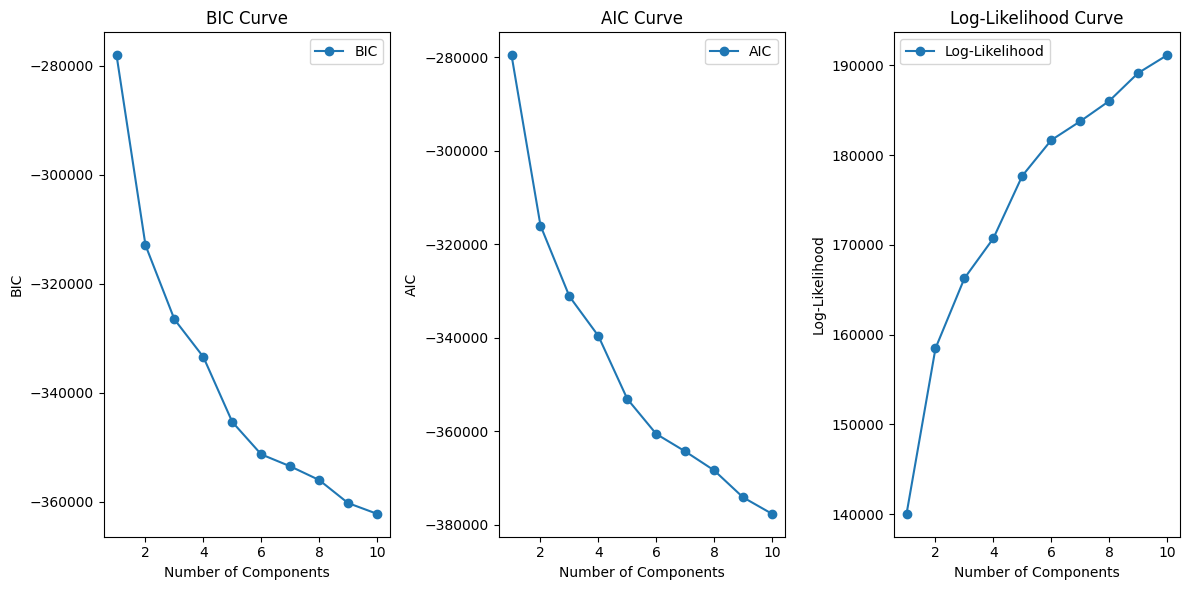

Optimal number of components (BIC): 10
Optimal number of components (AIC): 10


In [24]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Example dataset (replace this with your actual data)
data = X_scaled # Replace with your features

# Range of components to test
n_components_range = range(1, 11)  # Test 1 to 10 components

# Store BIC, AIC, and log-likelihood values
bic_scores = []
aic_scores = []
log_likelihoods = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(data)
    
    # Append BIC, AIC, and log-likelihood values
    bic_scores.append(gmm.bic(data))
    aic_scores.append(gmm.aic(data))
    log_likelihoods.append(gmm.score(data) * len(data))  # Total log-likelihood

# Plot BIC, AIC, and log-likelihood
plt.figure(figsize=(12, 6))

# Plot BIC
plt.subplot(1, 3, 1)
plt.plot(n_components_range, bic_scores, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('BIC Curve')
plt.legend()

# Plot AIC
plt.subplot(1, 3, 2)
plt.plot(n_components_range, aic_scores, marker='o', label='AIC')
plt.xlabel('Number of Components')
plt.ylabel('AIC')
plt.title('AIC Curve')
plt.legend()

# Plot Log-Likelihood
plt.subplot(1, 3, 3)
plt.plot(n_components_range, log_likelihoods, marker='o', label='Log-Likelihood')
plt.xlabel('Number of Components')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Find the best n_components based on the lowest BIC or AIC
optimal_bic = n_components_range[np.argmin(bic_scores)]
optimal_aic = n_components_range[np.argmin(aic_scores)]

print(f"Optimal number of components (BIC): {optimal_bic}")
print(f"Optimal number of components (AIC): {optimal_aic}")